In [12]:
import scanpy as sc
sc.settings.verbosity = 3   

import numpy as np

In [48]:
import os
dropseqfiles = os.listdir("/mnt/ibm_lg/angela/covid_tissue_atlas/covid_alignment/")
dropseqfiles
if adata:
    del adata
for f in dropseqfiles:
    adataaux = sc.read_text("/mnt/ibm_lg/angela/covid_tissue_atlas/covid_alignment/"+f).transpose()
    adataaux.obs['samples'] = f.split(".")[0]
    try:
        adata = adata.concatenate(adataaux,join='outer')
    except:
        adata = adataaux
adata.X = np.nan_to_num(adata.X)

In [47]:
dropseqfiles

['PA_AUG_PB_1A_S1_dge.txt',
 'Kidney_1_2_DB_Cov19_5_27_20_Kidney_1_2_dge.txt',
 'Prostate_1_DB_Cov19_5_27_20_Prostate_1_dge.txt',
 'Prostate_2_DB_Cov19_5_27_20_Prostate_2_dge.txt',
 'Testes_1_DB_Cov19_5_27_20_Testes_1_dge.txt',
 'Testes_2_DB_Cov19_5_27_20_Testes_2_dge.txt',
 'DB_Cov19_5_27_20_Liver_1_2_dge.txt']

In [28]:
adata_covid = adata.copy()
adata_covid

AnnData object with n_obs × n_vars = 3701 × 32477 
    obs: 'batch'

In [19]:
import os
dropseqfiles = os.listdir("/mnt/ibm_lg/angela/covid_tissue_atlas/human_alignment/")

if adata:
    del adata
for f in dropseqfiles:
    adataaux = sc.read_text("/mnt/ibm_lg/angela/covid_tissue_atlas/human_alignment/"+f).transpose()
    try:
        adata = adata.concatenate(adataaux,join='outer')
    except:
        adata = adataaux
adata.X = np.nan_to_num(adata.X)

In [6]:
adata_human = adata.copy()
adata_human

AnnData object with n_obs × n_vars = 3033 × 23402 
    obs: 'batch'

In [7]:
adata_covid, adata_human

(AnnData object with n_obs × n_vars = 2957 × 28233 
     obs: 'batch', AnnData object with n_obs × n_vars = 3033 × 23402 
     obs: 'batch')

In [23]:
adata_covid.var_names[adata_covid.var_names.str.startswith('ORF')]#[~adata_covid.var_names.isin(adata_human.var_names)]

Index(['ORF1a'], dtype='object')

In [9]:
adata_human.var[~adata_human.var_names.isin(adata_covid.var_names)]

""
AC002398.5
AC002511.1
AC003102.3
AC004070.1
AC004158.2
...
RP11-267A15.1
GPR114
RN7SL529P
RP11-371I1.2


In [10]:
adata_human.var_names[adata_human.var_names.str.startswith("ORF")]

Index([], dtype='object')

In [24]:
adata_covid.var_names[adata_covid.var_names.str.startswith("ORF")]

Index(['ORF1a'], dtype='object')

# Covid

In [29]:
adata.var_names[adata.var_names.str.startswith('ORF')]

Index(['ORF1a'], dtype='object')

In [49]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:00:03)
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [50]:
adata.write("/mnt/ibm_lg/angela/covid_tissue_atlas/covid19_tissue_atlas_donor_2.h5ad")

... storing 'samples' as categorical


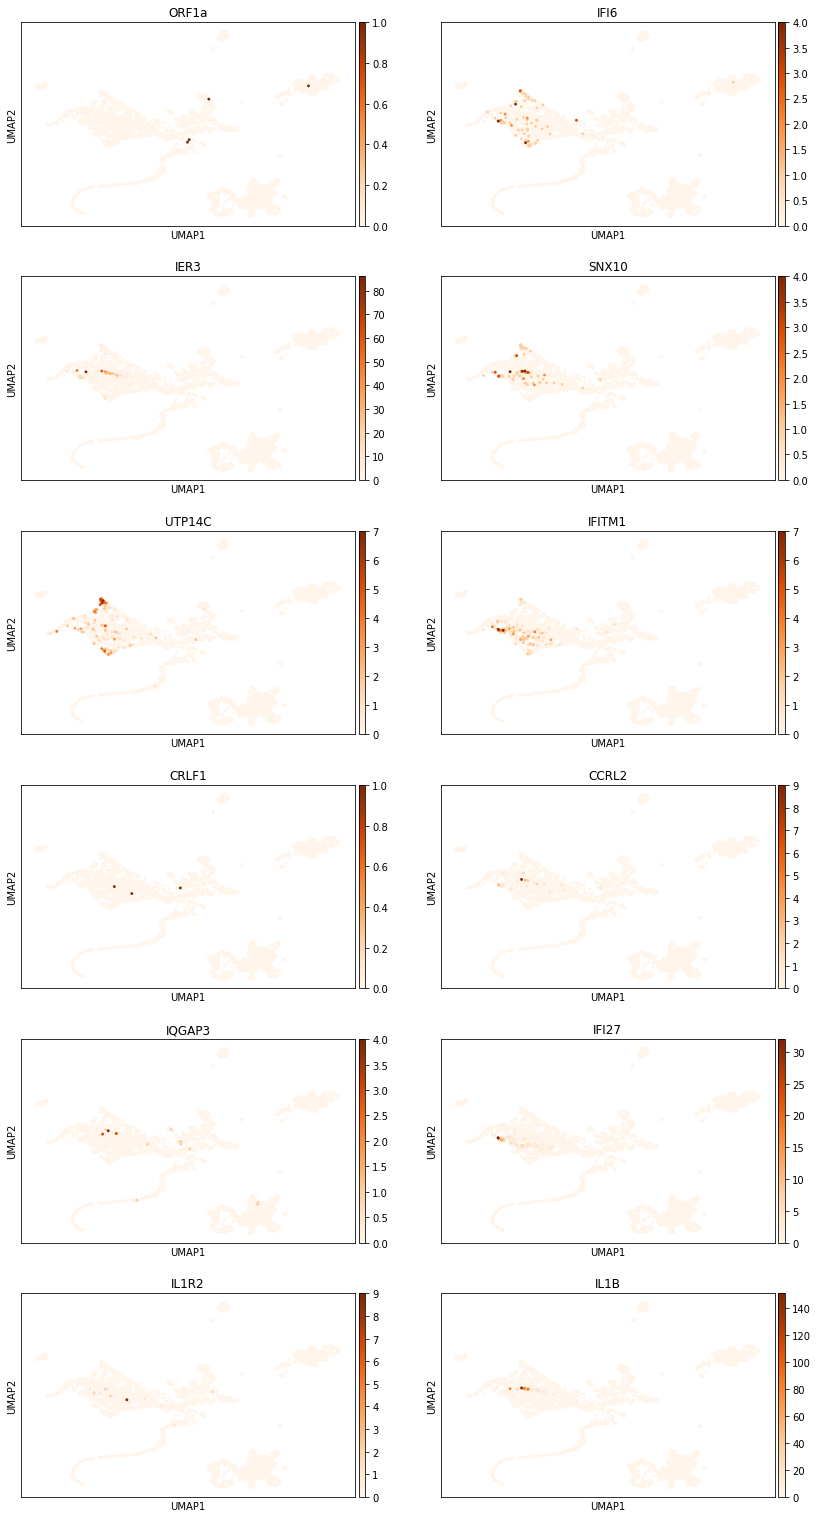

In [37]:
sc.pl.umap(adata,
           color=['ORF1a','IFI6', 'IER3', 'SNX10', 'UTP14C', 'IFITM1', 'CRLF1', 'CCRL2', 'IQGAP3', 'IFI27','IL1R2','IL1B'],
           cmap='Oranges',ncols=2)

In [46]:
adata[:,adata.var_names[adata.var_names=='ORF1a']].X

ArrayView([[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]], dtype=float32)

In [44]:
adata2.X

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)